In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [55]:
data=pd.read_csv("./student_data.csv");
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


***Preprocessing and EDA of student data***

<AxesSubplot:xlabel='admit', ylabel='count'>

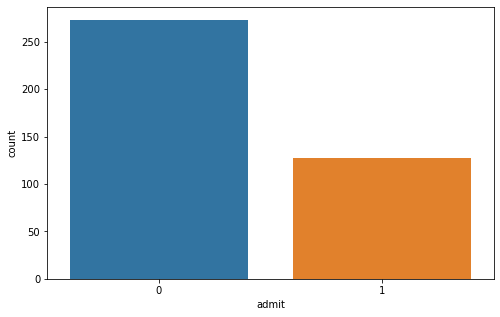

In [56]:
# check for balanced/unbalanced data
plt.figure(figsize=(8,5))
sns.countplot(data=data,x="admit")

<AxesSubplot:>

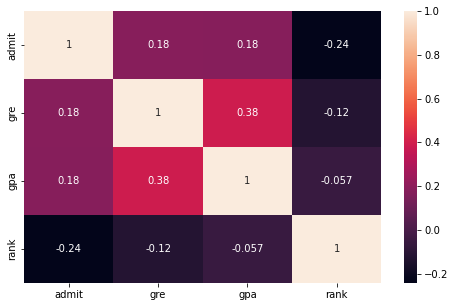

In [57]:
#Finding the correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='gre', ylabel='gpa'>

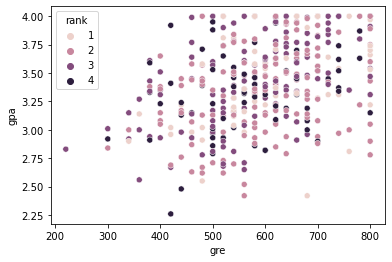

In [58]:
#Plotting a scatter plot with hue as rank
sns.scatterplot(data=data,x="gre",y="gpa",hue="rank")

<AxesSubplot:xlabel='gre', ylabel='gpa'>

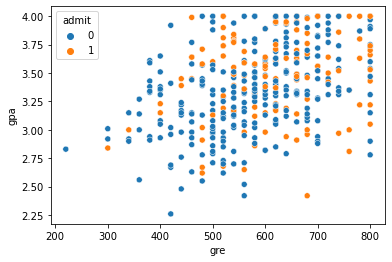

In [59]:
#Plotting a scatter plot with hue as admit
sns.scatterplot(data=data,x="gre",y="gpa",hue="admit")

In [60]:
print("*"*150);
print(data.info());
print("*"*150);
data.describe().transpose()

******************************************************************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB
None
******************************************************************************************************************************************************


,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.3175,0.466087,0.00,0.00,0.000,1.00,1.0
gre,400.0,587.7000,115.516536,220.00,520.00,580.000,660.00,800.0
gpa,400.0,3.3899,0.380567,2.26,3.13,3.395,3.67,4.0
rank,400.0,2.4850,0.944460,1.00,2.00,2.000,3.00,4.0


In [61]:
sum_of_null=pd.DataFrame(data.isnull().sum(),columns=["sum"])
sum_of_null[sum_of_null["sum"]>0]


,sum


***Splitting/Scaling the data***

In [62]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(data.drop("admit",axis=1),data["admit"],random_state=45,test_size=0.25);
print("X-train :",x_train.shape);
print("Y-train :",y_train.shape);
print("X-test :",x_test.shape);
print("Y-test :",y_test.shape);

X-train : (300, 3)
Y-train : (300,)
X-test : (100, 3)
Y-test : (100,)


In [63]:
#Scaling the values
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
x_train=Scaler.fit_transform(x_train);
x_test=Scaler.transform(x_test);

***Training the model***

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping



In [65]:
model=Sequential([
    Dense(100,activation="relu"),
    Dropout(0.2),
    Dense(70,activation="relu"),
    Dropout(0.2),
    Dense(10,activation="relu"),
    Dense(1,activation="sigmoid")
]);

model.compile(optimizer="adam",loss="binary_crossentropy");

In [66]:
Early_callback=EarlyStopping(patience=30,monitor="val_loss",mode="min",verbose=1);
model.fit(x=x_train,y=y_train,epochs=600,validation_data=(x_test,y_test),callbacks=[Early_callback],batch_size=50);

Epoch 1/600
6/6 [==============================] - 3s 245ms/step - loss: 0.7648 - val_loss: 0.7200
Epoch 2/600
6/6 [==============================] - 0s 21ms/step - loss: 0.7206 - val_loss: 0.6913
Epoch 3/600
6/6 [==============================] - 0s 19ms/step - loss: 0.6836 - val_loss: 0.6767
Epoch 4/600
6/6 [==============================] - 0s 18ms/step - loss: 0.6630 - val_loss: 0.6684
Epoch 5/600
6/6 [==============================] - 0s 17ms/step - loss: 0.6494 - val_loss: 0.6622
Epoch 6/600
6/6 [==============================] - 0s 18ms/step - loss: 0.6367 - val_loss: 0.6579
Epoch 7/600
6/6 [==============================] - 0s 17ms/step - loss: 0.6283 - val_loss: 0.6562
Epoch 8/600
6/6 [==============================] - 0s 16ms/step - loss: 0.6211 - val_loss: 0.6555
Epoch 9/600
6/6 [==============================] - 0s 17ms/step - loss: 0.6088 - val_loss: 0.6556
Epoch 10/600
6/6 [==============================] - 0s 18ms/step - loss: 0.6154 - val_loss: 0.6554
Epoch 11/600
6/6 [

<AxesSubplot:>

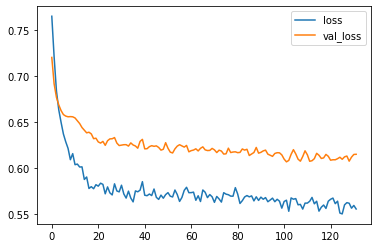

In [67]:
__los__=pd.DataFrame(model.history.history);
__los__.plot()

In [68]:
from sklearn.metrics import classification_report,confusion_matrix
__pred__=model.predict(x_test);
__binary_pred__=(__pred__>0.5).astype("int32");
val=pd.DataFrame(__binary_pred__);
print(y_test.value_counts());
print(val.value_counts());

4/4 [==============================] - 0s 5ms/step
0    64
1    36
Name: admit, dtype: int64
0    88
1    12
dtype: int64


              precision    recall  f1-score   support

           0       0.69      0.95      0.80        64
           1       0.75      0.25      0.38        36

    accuracy                           0.70       100
   macro avg       0.72      0.60      0.59       100
weighted avg       0.71      0.70      0.65       100



<AxesSubplot:>

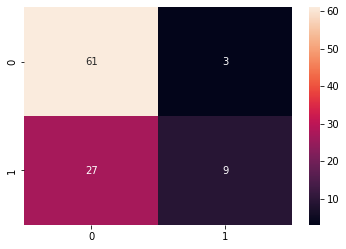

In [69]:
# Classification Report and Confusion Matrix
print(classification_report(y_test,__binary_pred__))
sns.heatmap(confusion_matrix(y_test,__binary_pred__),annot=True)